In [2]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy import stats

In [4]:
deliveries1=pd.read_csv("deliveries.csv")
matches2=pd.read_csv("matches.csv")

In [5]:
deliveries1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
matches2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


1      1
2      4
3     15
4     34
5     57
6     68
7     70
8     48
9     32
10    10
Name: win_by_wickets, dtype: int64


Text(0, 0.5, 'Frequency of the data')

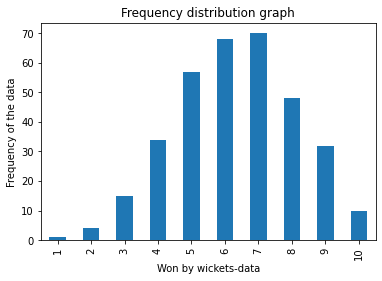

In [ ]:
win_by_wickets_data = matches2[matches2.win_by_wickets >= 1].win_by_wickets
win_by_wickets_freq = win_by_wickets_data.value_counts(sort=False)
print(win_by_wickets_freq)
plt = win_by_wickets_freq.plot.bar()
plt.set_title("Frequency distribution graph")
plt.set_xlabel("Won by wickets-data")
plt.set_ylabel("Frequency of the data")

1     0.002950
2     0.011799
3     0.044248
4     0.100295
5     0.168142
6     0.200590
7     0.206490
8     0.141593
9     0.094395
10    0.029499
Name: win_by_wickets, dtype: float64


Text(0, 0.5, 'Relative frequency in (%)')

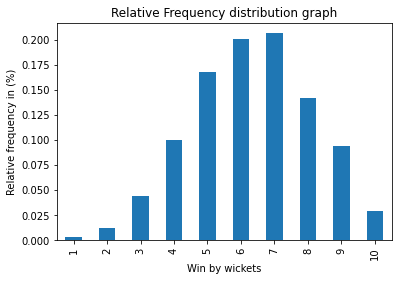

In [ ]:
win_by_wickets_rel_freq = win_by_wickets_data.value_counts(sort = False,
                                                           normalize = True)
print(win_by_wickets_rel_freq)
plt = win_by_wickets_rel_freq.plot.bar()
plt.set_title("Relative Frequency distribution graph")
plt.set_xlabel("Win by wickets")
plt.set_ylabel("Relative frequency in (%)")

1     0.002950
2     0.014749
3     0.058997
4     0.159292
5     0.327434
6     0.528024
7     0.734513
8     0.876106
9     0.970501
10    1.000000
Name: win_by_wickets, dtype: float64


Text(0, 0.5, 'Cumulative relative frequency (%)')

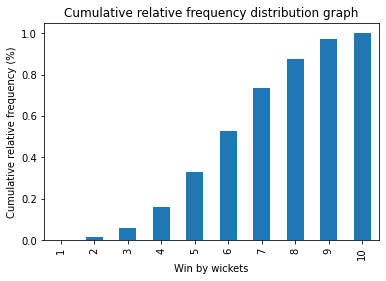

In [ ]:
win_by_wickets_cumulative_freq = win_by_wickets_data.value_counts(sort = False, normalize = True).cumsum()
print(win_by_wickets_cumulative_freq)
plt = win_by_wickets_cumulative_freq.plot.bar()
plt.set_title("Cumulative relative frequency distribution graph")
plt.set_xlabel("Win by wickets")
plt.set_ylabel("Cumulative relative frequency (%)")

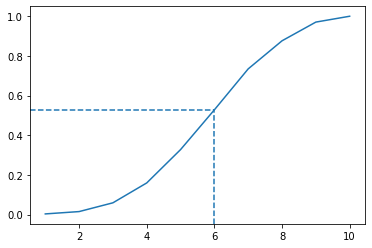

In [ ]:
plt = win_by_wickets_cumulative_freq.plot.line()
plt.axhline(y = win_by_wickets_cumulative_freq[6], xmax = 5.5/10, linestyle='dashed')
plt.axvline(x = 6, ymax = win_by_wickets_cumulative_freq[6], linestyle='dashed')

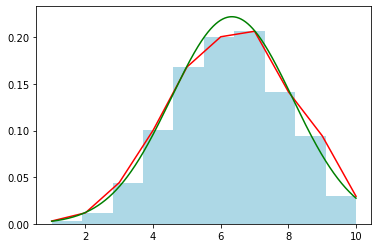

In [ ]:
# Get mean (mu) and std (sigma)
win_by_wickets_mean, win_by_wickets_std = win_by_wickets_data.mean(), win_by_wickets_data.std()

# Plot histogram (normalized) - LIGHT-BLUE
win_by_wickets_data.hist(color='lightblue', weights = np.zeros_like(win_by_wickets_data) + 1.0 / win_by_wickets_data.count())

# Plot line graph - RED
win_by_wickets_data.value_counts(sort=False, normalize=True).plot.line(color='red')

# Normal distribution for random points between 1 to 10 with mean, std.
random_data = np.arange(1, 10, 0.001)
pyplot.plot(random_data, stats.norm.pdf(random_data, win_by_wickets_mean, win_by_wickets_std), color='green')

In [ ]:
mu, sigma = 128, 25
highest_scores = np.random.normal(mu, sigma, 1000) 

count, bins,_= pyplot.hist(highest_scores, 100, normed = True, color='lightblue')
pyplot.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
    linewidth = 2, color = 'r')

In [ ]:
win_by_runs_data = matches2[matches2.win_by_runs > 0].win_by_runs
win_by_runs_mean, win_by_runs_std = win_by_runs_data.mean(), win_by_runs_data.std()
z_score_35 = (35 - win_by_runs_mean) / win_by_runs_std
print(f'Z-score of 35 is {z_score_35:.2f}')

Z-score of 35 is 0.17


In [ ]:
z_score = stats.norm.cdf(0.19)
print(f'z-score of 0.19 = {z_score * 100:.2f} percentile')

z-score of 0.19 = 57.53 percentile


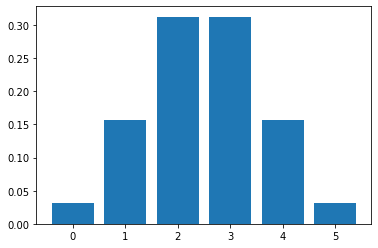

In [ ]:
def compute_binomial_probability(x, n, p):
    outcomes = math.factorial(n) / (math.factorial(x) * math.factorial(n - x))
    probability_of_each_outcome = p ** x * (1 - p) ** (n - x)
    return outcomes * probability_of_each_outcome

def plot_binomial_distribution_graph(n, p):
    probabilities = list(map(lambda x: compute_binomial_probability(x, n, p), range(0, n+1)))
    pyplot.bar(list(range(0, n+1)), probabilities)

plot_binomial_distribution_graph(5, 0.5)

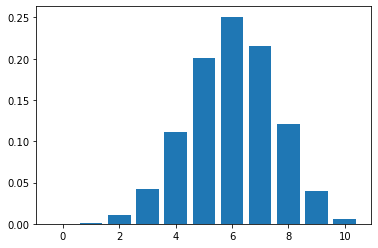

In [ ]:
plot_binomial_distribution_graph(10,0.6)

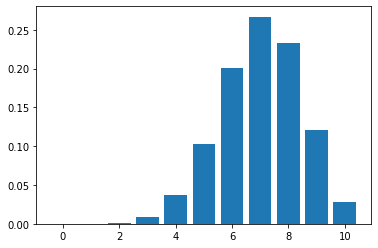

In [ ]:
plot_binomial_distribution_graph(10, 0.7)

<BarContainer object of 2 artists>

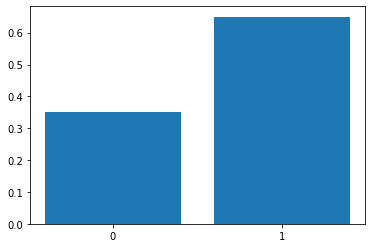

In [ ]:
pyplot.bar(['0', '1'], [0.35, 0.65])